Note : Use the drive link for the processed dataset

In [8]:
input_file_path=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/celeb/train/*'
input_file_path2=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/*'
input_file_path3=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/FakeAVCeleb_v1.2/train/*'
input_file_path4=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/ff++/train/*'

test_file_path=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/celeb/test/*'
test_file_path2=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/test/*'
test_file_path3=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/FakeAVCeleb_v1.2/test/*'
test_file_path4=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/ff++/test/*'

meta_data_path=f'/Users/jiyeong/Desktop/컴공 캡스톤/Dataset'
checkpoint_path=f'/Users/jiyeong/Desktop/컴공 캡스톤/src/checkpoints'
frames=100

In [9]:
#import libraries
#!pip3 install face_recognition

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from torch.autograd import Variable
import time
import sys
from torch import nn
from torchvision import models

In [10]:
#! pip install openpyxl

In [11]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path) 
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
# video_fil =  glob.glob(f'{input_file_path}/*.mp4')   # 경로 변경
video_fil = glob.glob(f'{input_file_path2}/*.mp4')
video_fil += glob.glob(f'{input_file_path3}/*.mp4')
video_fil += glob.glob(f'{input_file_path4}/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 2400
['/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/ckrafhjqpz.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/bcjteassyd.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/iieygeizqt.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/fqnvpbvfmf.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/gxqzavbulk.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/dutdnjgeud.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/ghccycttqk.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/ibcmyzqrdn.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/abbgqbrdiz.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/hpdnhefbll.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/cvuiocbcbz.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/hddgrmdzta.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Dataset/DFDC/train/real/dpmgoiwhuf.mp4', '/Users/jiyeong/Desktop/컴공 캡스톤/Datase

In [12]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random

# video_files =  glob.glob(f'{input_file_path}/*.mp4')   # 경로 변경
video_files = glob.glob(f'{input_file_path2}/*.mp4')
video_files += glob.glob(f'{input_file_path3}/*.mp4')
video_files += glob.glob(f'{input_file_path4}/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)

frame_count = []
short_frame=[]
print(len(video_files))

for video_file in reversed(video_files): # 이거 앞에서 부터 하면 remove로 인해 frame_count랑 video_files 길이가 달라짐, 그래서 reversed 추가하여 뒤에서 부터 탐색!!
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<frames):  # frames 변수 위에서 조정
    video_files.remove(video_file)
    short_frame.append(video_file)
    continue

  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
  
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))
print('Short_frame_count : ', len(short_frame))


2400
frames are  [148, 148, 148, 148, 148, 140, 100, 148, 148, 148, 148, 104, 148, 148, 116, 148, 108, 148, 148, 148, 100, 148, 148, 148, 148, 100, 148, 132, 128, 148, 148, 148, 148, 112, 148, 148, 148, 148, 112, 148, 148, 148, 148, 148, 116, 148, 148, 148, 100, 148, 148, 148, 148, 148, 148, 100, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 100, 112, 148, 108, 137, 148, 148, 100, 148, 148, 148, 136, 128, 108, 136, 148, 128, 148, 120, 148, 148, 148, 148, 148, 148, 148, 136, 148, 148, 148, 148, 148, 104, 148, 148, 132, 148, 148, 148, 148, 148, 120, 148, 148, 148, 148, 148, 148, 148, 148, 148, 112, 148, 148, 148, 148, 148, 120, 148, 124, 124, 148, 112, 148, 148, 148, 148, 148, 124, 148, 148, 148, 148, 148, 148, 148, 148, 116, 148, 148, 148, 148, 148, 132, 112, 148, 148, 148, 140, 112, 148, 148, 132, 148, 148, 148, 148, 148, 148, 148, 148, 148, 104, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 104, 140, 148, 148, 148, 104, 148, 10

In [13]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path) 
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [14]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv(f'{meta_data_path}/Global_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  1675
test :  719
TRAIN:  Real: 729  Fake: 946
TEST:  Real: 329  Fake: 390


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


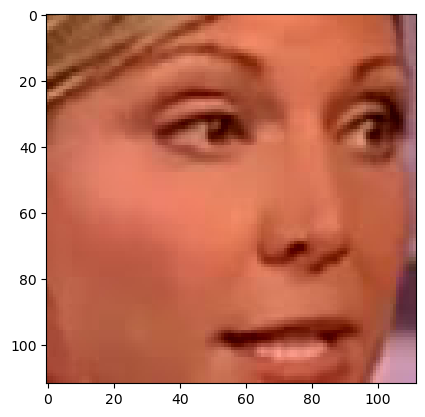

In [15]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv(f'{meta_data_path}/Global_metadata.csv',names=header_list)
#print(labels)

train_videos = video_files[:int(0.7*len(video_files))]  # 7:3으로 train:test
valid_videos = video_files[int(0.7*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
# cpu사용하기 때문에 병렬처리 뻄
# train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
# valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
train_loader = DataLoader(train_data,batch_size = 32,shuffle = True,num_workers = 0)  # 여기서 batch size 조정 (한번에 몇개의 데이터를 묶어서 학습할지, batch개수=데이터 수/batch size)
valid_loader = DataLoader(val_data,batch_size = 32,shuffle = True,num_workers = 0)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [16]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [17]:
# model = Model(2).cuda()
# a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

# cuda 사용 안되서 cpu작동으로 바꿈
# model = Model(2).cpu()
# a, b = model(torch.from_numpy(np.empty((1, 20, 3, 112, 112))).type(torch.FloatTensor))

import torch
import numpy as np

# 디바이스 설정
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"✅ Using device: {device}")

# 모델을 MPS로 보내기
model = Model(2).to(device)

# 입력 텐서도 MPS로 보내기
input_tensor = torch.from_numpy(np.empty((1, 20, 3, 112, 112))).type(torch.FloatTensor).to(device)

# 모델 실행
a, b = model(input_tensor)


/Users/jiyeong/anaconda3/envs/ba2023/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/jiyeong/anaconda3/envs/ba2023/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Using device: mps


In [18]:
import torch
from torch.autograd import Variable
import time
import os
import sys
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        # GPU에서 실행 안함
        # if torch.cuda.is_available():
        #     targets = targets.type(torch.cuda.LongTensor)
        #     inputs = inputs.cuda()

        # inputs, targets MPS로 올리기
        inputs = inputs.to(device)
        targets = targets.to(device)

        _,outputs = model(inputs)
        loss = criterion(outputs, targets)
        acc = calculate_accuracy(outputs, targets)
        # loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        # acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))

    # 모델 저장
    os.makedirs(checkpoint_path, exist_ok=True)  # 폴더 없으면 생성
    # torch.save(model.state_dict(),'/content/checkpoint.pt')
    torch.save(model.state_dict(), f'{checkpoint_path}/checkpoint.pt')

    return losses.avg,accuracies.avg

def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            # if torch.cuda.is_available():
                # targets = targets.cuda().type(torch.cuda.FloatTensor)
                # inputs = inputs.cuda()

            #  GPu 안되서 바꿈
            # inputs = inputs.cpu()  # inputs를 CPU로
            # targets = targets.cpu()  # targets를 CPU로

            # inputs, targets MPS로 올리기 (CPU보다 빠름)
            inputs = inputs.to(device)
            targets = targets.to(device)
            #

            _,outputs = model(inputs)
            # GPu 안되서 바꿈
            # loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            # acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            loss = torch.mean(criterion(outputs, targets))
            acc = calculate_accuracy(outputs, targets)
            #
            _,p = torch.max(outputs,1) 
            # true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            true += (targets.type(torch.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()

            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size



In [19]:
#!pip install seaborn

In [28]:
#Output confusion matrix   성능 평가
import seaborn as sn
from sklearn.metrics import confusion_matrix  #내가 추가함
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 16}) # font size ,fmt='d'로 정수 표현
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)


    y_true = (['Fake'] * sum(cm[0]) + ['Real'] * sum(cm[1]))
    y_pred = (['Fake'] * cm[0][0] + ['Real'] * cm[0][1] +
            ['Fake'] * cm[1][0] + ['Real'] * cm[1][1])

    # 성능 출력
    print("📊 Confusion Matrix:\n", cm)
    print("\n📈 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))

In [21]:
# loss 그래프
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 52 / 53] [Loss: 0.657101, Acc: 62.81%]Testing
[Batch 22 / 23]  [Loss: 0.540826, Acc: 72.18%]
Accuracy 72.1835883171071
✅ Epoch 1 소요 시간: 124.34초
[Epoch 2/20] [Batch 52 / 53] [Loss: 0.474222, Acc: 81.19%]Testing
[Batch 22 / 23]  [Loss: 0.434698, Acc: 78.58%]
Accuracy 78.58136300417246
✅ Epoch 2 소요 시간: 118.66초
[Epoch 3/20] [Batch 52 / 53] [Loss: 0.359696, Acc: 89.43%]Testing
[Batch 22 / 23]  [Loss: 0.461492, Acc: 79.28%]
Accuracy 79.27677329624478
✅ Epoch 3 소요 시간: 120.25초
[Epoch 4/20] [Batch 52 / 53] [Loss: 0.265951, Acc: 93.01%]Testing
[Batch 22 / 23]  [Loss: 0.600423, Acc: 80.25%]
Accuracy 80.25034770514604
✅ Epoch 4 소요 시간: 119.46초
[Epoch 5/20] [Batch 52 / 53] [Loss: 0.253709, Acc: 94.45%]Testing
[Batch 22 / 23]  [Loss: 0.410833, Acc: 82.48%]
Accuracy 82.47566063977747
✅ Epoch 5 소요 시간: 121.50초
[Epoch 6/20] [Batch 52 / 53] [Loss: 0.200664, Acc: 96.06%]Testing
[Batch 22 / 23]  [Loss: 0.560456, Acc: 81.92%]
Accuracy 81.91933240611961
✅ Epoch 6 소요 시간: 117.67초
[Epoch 7/20

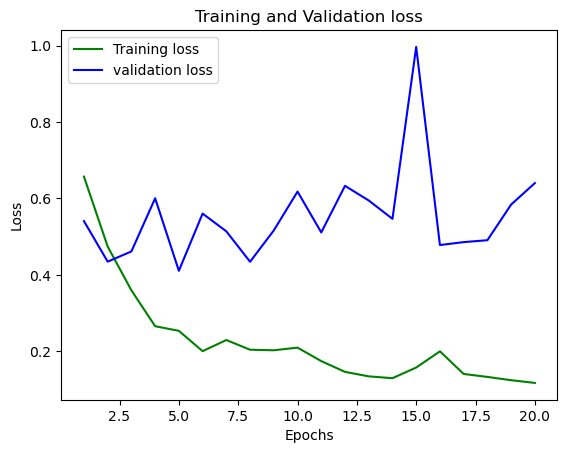

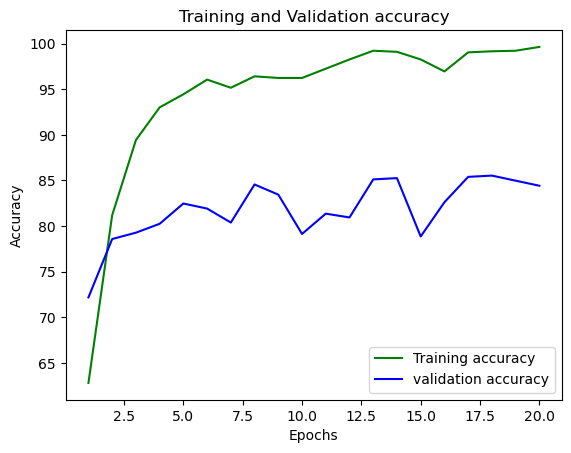

[[340  50]
 [ 62 267]]
✅ 전체 학습 소요 시간: 2399.42초


In [22]:
from sklearn.metrics import confusion_matrix
import time
#learning rate
lr = 1e-4              #시작 1e-5#0.001
#number of epochs 
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()

#GPU안되서 수정
# criterion = nn.CrossEntropyLoss().cuda()
#criterion = nn.CrossEntropyLoss().cpu()  # CPU 사용 버전
criterion = nn.CrossEntropyLoss().to(device) #MPS 사용버전
#
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []

# 시간 측정 시작
start_time = time.time()
for epoch in range(1,num_epochs+1):
    epoch_start_time = time.time()
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
    
    epoch_end_time = time.time()
    epoch_elapsed = epoch_end_time - epoch_start_time
    print(f"✅ Epoch {epoch} 소요 시간: {epoch_elapsed:.2f}초")
# 시간 측정 끝
end_time = time.time()
    
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
elapsed_time = end_time - start_time
print(f"✅ 전체 학습 소요 시간: {elapsed_time:.2f}초")


[[340  50]
 [ 62 267]]
True positive =  340
False positive =  50
False negative =  62
True negative =  267




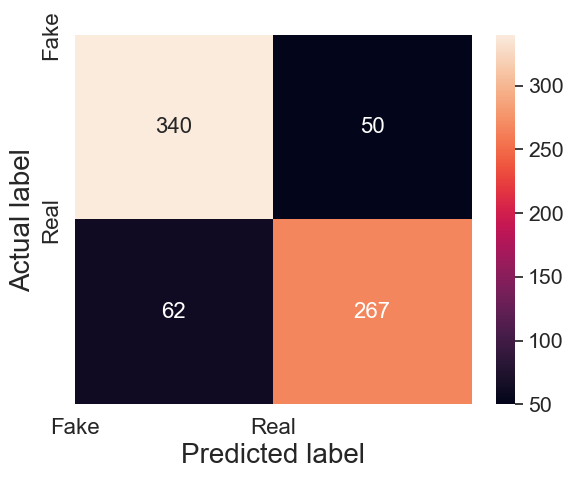

Calculated Accuracy 84.42280945757997
📊 Confusion Matrix:
 [[340  50]
 [ 62 267]]

📈 Classification Report:
              precision    recall  f1-score   support

        Fake       0.85      0.87      0.86       390
        Real       0.84      0.81      0.83       329

    accuracy                           0.84       719
   macro avg       0.84      0.84      0.84       719
weighted avg       0.84      0.84      0.84       719



In [29]:
print_confusion_matrix(true,pred)

## predict

In [25]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
# 디바이스 설정
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"✅ Using device: {device}")

# 1. 모델 구조를 다시 정의
model = Model(num_classes=2).to(device)

# 2. checkpoint 불러오기
model.load_state_dict(torch.load(f'{checkpoint_path}/checkpoint.pt'))

# 3. 평가 모드 전환
model.eval()

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])



In [ ]:
import torch
from torchvision import transforms
import cv2
import os
import pandas as pd
import glob
import random



new_video_files =  glob.glob(f'{test_input_file_path}/*.mp4')   # 경로 변경
new_video_files += glob.glob(f'{test_output_file_path}/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
random.shuffle(new_video_files)
random.shuffle(new_video_files)

frame_count = []
short_frame=[]

for video_file in reversed(new_video_files): # 이거 앞에서 부터 하면 remove로 인해 frame_count랑 video_files 길이가 달라짐, 그래서 reversed 추가하여 뒤에서 부터 탐색!!
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<frames):  # frames 변수 위에서 조정
    new_video_files.remove(video_file)
    short_frame.append(video_file)
    continue

  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
  
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))
print('Short_frame_count : ', len(short_frame))
